In [58]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn

## GPU CODE -1 (CREATING DEVICE VAR)

In [59]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [60]:
df = pd.read_csv("/content/sample_data/fashion-mnist_train.csv")

In [61]:
df.shape

(60000, 785)

In [62]:
X = df.drop("label", axis=1)
y = df["label"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

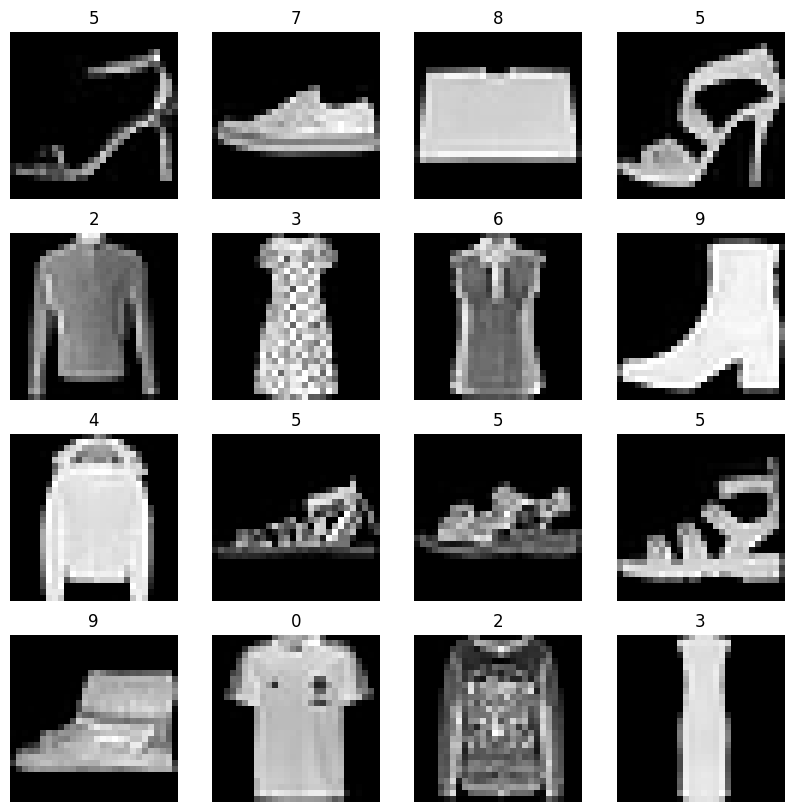

In [64]:
fig = plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(y_train.iloc[i])
    plt.axis("off")
plt.show()

In [65]:
X_train =X_train/255.0
X_test =X_test/255.0

In [66]:
class custom_dataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [67]:
train_data = custom_dataset(X_train, y_train)
test_data = custom_dataset(X_test, y_test)

In [68]:
train_data = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = DataLoader(test_data, batch_size=32, shuffle=False)

In [69]:
len(train_data) # 150*32 = 4800

1500

In [70]:
class Model(torch.nn.Module):
    def __init__(self,feature_len):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(feature_len, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.Softmax(dim=1)
        )
    def forward(self, x):
        return self.network(x)

In [71]:
x_train, y_train = next(iter(train_data))
len(x_train[0])

784

In [72]:
model = Model(len(x_train[0]))

## GPU CODE 2- MOVING MODEL TO DEVICE

In [73]:
model2 = model.to(device)

In [74]:
loss = nn.CrossEntropyLoss()  # The cross entoropy loss expects y_pred as n len array and y as interger values

In [75]:
optim = torch.optim.SGD(model.parameters(),lr=0.5)

In [76]:
for i in range(50):
    net_loss= 0
    for x, y in train_data:

      ### MOVE DATA TO DEVICE
        x = x.to(device)
        y = y.to(device)

        y_pred = model2(x)
        l = loss(y_pred, y)

        l.backward()
        optim.step()
        optim.zero_grad()
        net_loss+=l.item()
    print(f"Epoch: {i},loss:{net_loss}, Loss: {net_loss/len(train_data)}")



Epoch: 0,loss:2693.478576898575, Loss: 1.79565238459905
Epoch: 1,loss:2599.046540260315, Loss: 1.7326976935068765
Epoch: 2,loss:2590.9624016284943, Loss: 1.7273082677523295
Epoch: 3,loss:2586.164437174797, Loss: 1.724109624783198
Epoch: 4,loss:2581.5588260889053, Loss: 1.7210392173926035
Epoch: 5,loss:2577.5884016752243, Loss: 1.7183922677834829
Epoch: 6,loss:2577.0636180639267, Loss: 1.7180424120426179
Epoch: 7,loss:2577.840562939644, Loss: 1.7185603752930958
Epoch: 8,loss:2573.716146707535, Loss: 1.7158107644716898
Epoch: 9,loss:2574.1331845521927, Loss: 1.7160887897014618
Epoch: 10,loss:2568.174082994461, Loss: 1.7121160553296406
Epoch: 11,loss:2567.8391340970993, Loss: 1.7118927560647328
Epoch: 12,loss:2568.7453982830048, Loss: 1.7124969321886698
Epoch: 13,loss:2566.0468661785126, Loss: 1.710697910785675
Epoch: 14,loss:2564.536721229553, Loss: 1.7096911474863687
Epoch: 15,loss:2566.41069483757, Loss: 1.710940463225047
Epoch: 16,loss:2565.1353231668472, Loss: 1.7100902154445647
Epoc

In [77]:
model.eval()

Model(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)

In [79]:
accuracy=0
total=0
for X_test,y_test in test_data:
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    y_pred = model2(X_test)
    y_pred = torch.argmax(y_pred, dim=1)
    accuracy+=torch.sum(y_pred==y_test).item()
    total+=len(y_pred)
print(accuracy/total)

0.74575


0.72